In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Relatorio_Atendimento_dos_Profissionais_janeiro.csv', 
                 skiprows=10, sep=';', encoding='latin1')

print(df.head())


        FA Consulta Local de Atendimento      Especialidade  \
0  1941180  2975635                  NaN  PS CLÍNICA MÉDICA   
1  1941182  2975643                  NaN  PS CLÍNICA MÉDICA   
2  1941185  2975663                  NaN  PS CLÍNICA MÉDICA   
3  1941186  2975680                  NaN  PS CLÍNICA MÉDICA   
4  1941190  2975730                  NaN  PS CLÍNICA MÉDICA   

      Tipo Atendimento Procedimento Início Atendimento   Fim Atendimento  \
0  CLASSIFICACAO_RISCO          NaN   01/01/2025 12:03  01/01/2025 12:06   
1  CLASSIFICACAO_RISCO          NaN   01/01/2025 12:18  01/01/2025 12:21   
2  CLASSIFICACAO_RISCO          NaN   01/01/2025 12:44  01/01/2025 12:47   
3  CLASSIFICACAO_RISCO          NaN   01/01/2025 12:54  01/01/2025 12:56   
4  CLASSIFICACAO_RISCO          NaN   01/01/2025 01:17  01/01/2025 01:21   

  Tempo Atendimento  
0         03min:43s  
1         03min:28s  
2         02min:59s  
3         01min:55s  
4         03min:32s  


In [26]:
df.columns

Index(['FA', 'Consulta', 'Local de Atendimento', 'Especialidade',
       'Tipo Atendimento', 'Procedimento', 'Início Atendimento',
       'Fim Atendimento', 'Tempo Atendimento'],
      dtype='object')

In [27]:
# Depois faz a contagem por 'Local de Atendimento' e plota, por exemplo:
contagem = df['Local de Atendimento'].value_counts().reset_index()
contagem.columns = ['Local de Atendimento', 'Qtd_Atendimentos']

top5 = contagem.head(5)

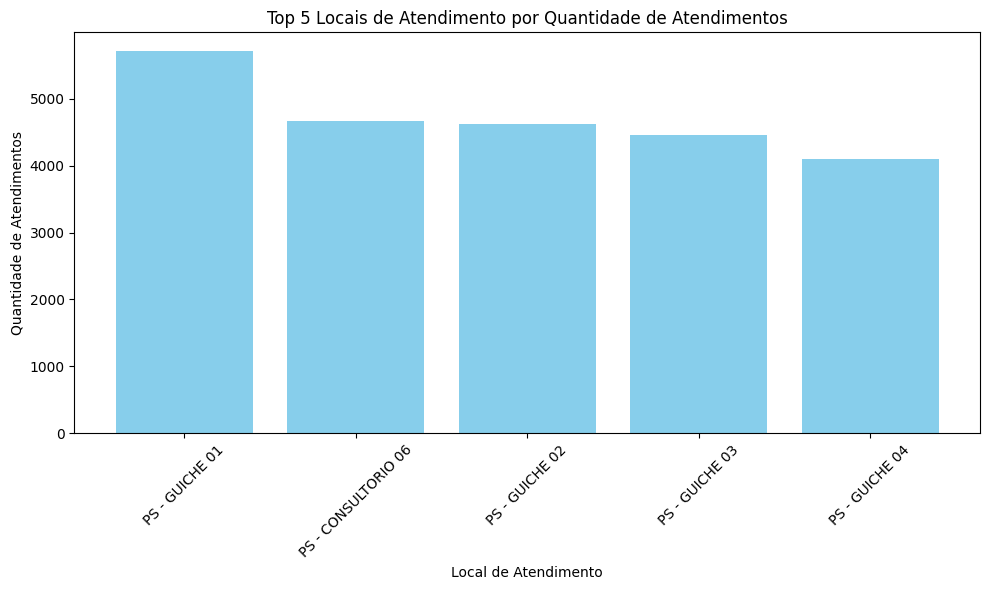

In [28]:
plt.figure(figsize=(10,6))
plt.bar(top5['Local de Atendimento'], top5['Qtd_Atendimentos'], color='skyblue')
plt.title('Top 5 Locais de Atendimento por Quantidade de Atendimentos')
plt.xlabel('Local de Atendimento')
plt.ylabel('Quantidade de Atendimentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# Contar quantos atendimentos por especialidade
contagem_especialidades = df['Especialidade'].value_counts().reset_index()
contagem_especialidades.columns = ['Especialidade', 'Qtd_Atendimentos']

# Mostrar as especialidades ordenadas (da maior para a menor)
print(contagem_especialidades)

# Se quiser só as top 10 especialidades, pode fazer:
top10_especialidades = contagem_especialidades.head(10)
print(top10_especialidades)


                    Especialidade  Qtd_Atendimentos
0               PS CLÍNICA MÉDICA             37076
1                    PS PEDIATRIA              5390
2               PS CIRURGIA GERAL              4252
3    PS ORTOPEDIA E TRAUMATOLOGIA              3453
4                  PS PSIQUIATRIA              3318
..                            ...               ...
159                           553                 1
160                           340                 1
161                           797                 1
162                           211                 1
163                            76                 1

[164 rows x 2 columns]
                  Especialidade  Qtd_Atendimentos
0             PS CLÍNICA MÉDICA             37076
1                  PS PEDIATRIA              5390
2             PS CIRURGIA GERAL              4252
3  PS ORTOPEDIA E TRAUMATOLOGIA              3453
4                PS PSIQUIATRIA              3318
5                PS ODONTOLOGIA               642
6 

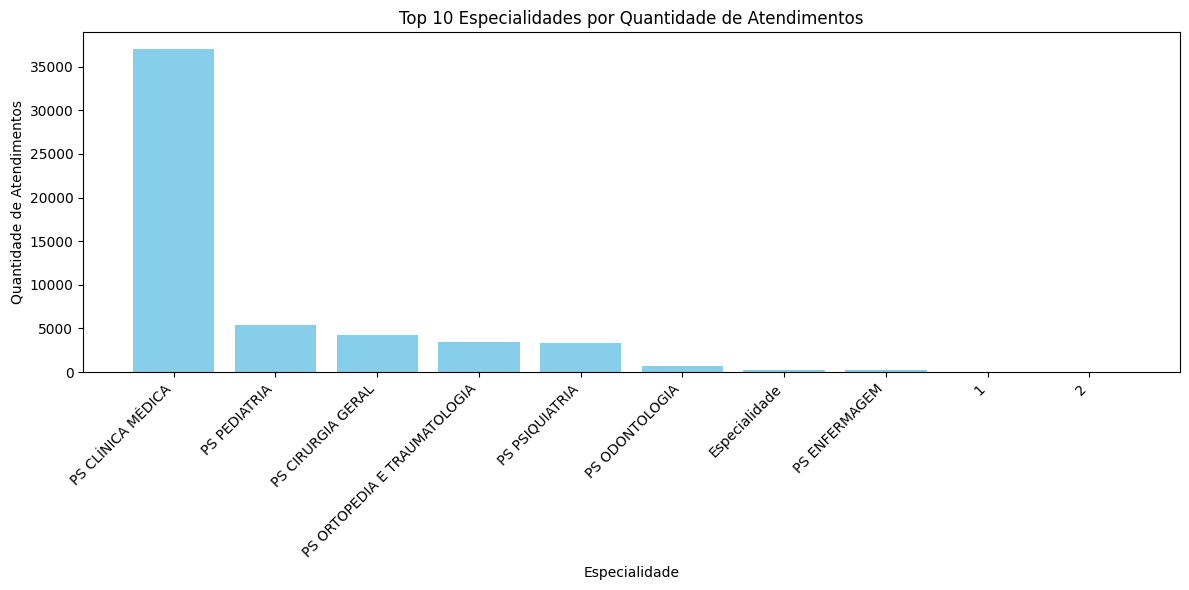

In [30]:
import matplotlib.pyplot as plt

# Supondo que 'contagem_especialidades' seja o DataFrame com as colunas 'Especialidade' e 'Qtd_Atendimentos'

# Selecionar as top 10 especialidades
top10 = contagem_especialidades.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['Especialidade'], top10['Qtd_Atendimentos'], color='skyblue')
plt.title('Top 10 Especialidades por Quantidade de Atendimentos')
plt.xlabel('Especialidade')
plt.ylabel('Quantidade de Atendimentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
top10

,Especialidade,Qtd_Atendimentos
0,PS CLÍNICA MÉDICA,37076
1,PS PEDIATRIA,5390
2,PS CIRURGIA GERAL,4252
3,PS ORTOPEDIA E TRAUMATOLOGIA,3453
4,PS PSIQUIATRIA,3318
5,PS ODONTOLOGIA,642
6,Especialidade,243
7,PS ENFERMAGEM,220
8,1,21
9,2,7


In [32]:
top10.columns

Index(['Especialidade', 'Qtd_Atendimentos'], dtype='object')

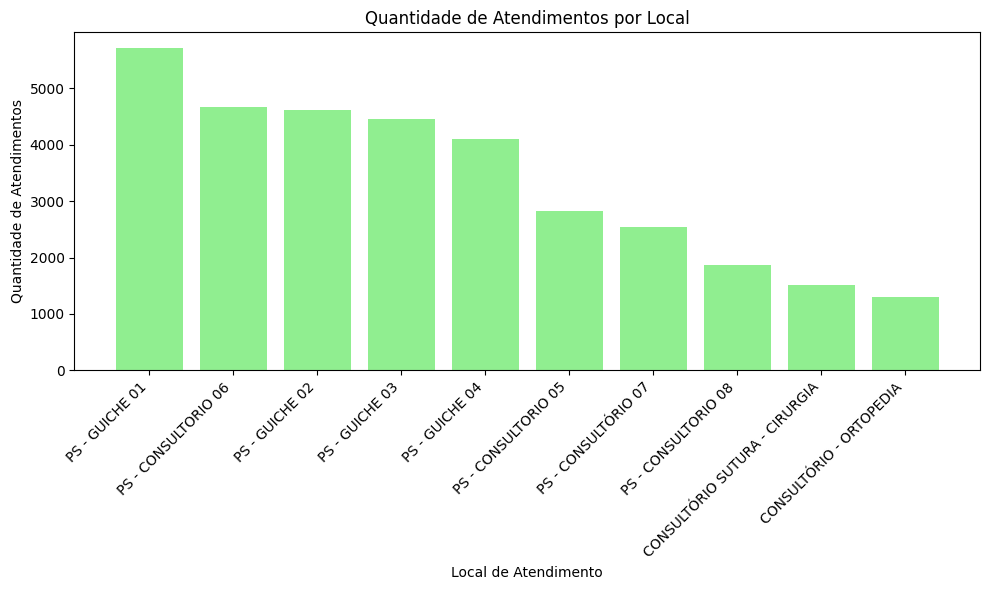

In [33]:
# Contar a quantidade de atendimentos por Local de Atendimento
contagem_local = df['Local de Atendimento'].value_counts().reset_index()
contagem_local.columns = ['Local de Atendimento', 'Qtd_Atendimentos']

# Selecionar os top locais, se quiser (exemplo: top 10)
top_locais = contagem_local.head(10)

# Plotar gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(top_locais['Local de Atendimento'], top_locais['Qtd_Atendimentos'], color='lightgreen')
plt.title('Quantidade de Atendimentos por Local')
plt.xlabel('Local de Atendimento')
plt.ylabel('Quantidade de Atendimentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [34]:
top_locais

,Local de Atendimento,Qtd_Atendimentos
0,PS - GUICHE 01,5710
1,PS - CONSULTORIO 06,4668
2,PS - GUICHE 02,4624
3,PS - GUICHE 03,4455
4,PS - GUICHE 04,4100
5,PS - CONSULTORIO 05,2821
6,PS - CONSULTÓRIO 07,2544
7,PS - CONSULTORIO 08,1877
8,CONSULTÓRIO SUTURA - CIRURGIA,1505
9,CONSULTÓRIO - ORTOPEDIA,1297


In [21]:
top_locais.columns

Index(['Local de Atendimento', 'Qtd_Atendimentos'], dtype='object')

### Gerando Arquivo CSV 

In [37]:
# Top 10 locais
top10_locais = df['Local de Atendimento'].value_counts().head(10).index

# Top 10 especialidades
top10_especialidades = df['Especialidade'].value_counts().head(10).index


In [38]:
# Filtrar todos os dados para os top 10 locais
df_top_locais = df[df['Local de Atendimento'].isin(top10_locais)]

# Filtrar todos os dados para as top 10 especialidades
df_top_especialidades = df[df['Especialidade'].isin(top10_especialidades)]


In [39]:
# Salvar os dados completos dos top locais
df_top_locais.to_csv('dados_top10_locais.csv', index=False, sep=';', encoding='utf-8-sig')

# Salvar os dados completos das top especialidades
df_top_especialidades.to_csv('dados_top10_especialidades.csv', index=False, sep=';', encoding='utf-8-sig')
